<span style="font-size: 1.8em;">__Visual Analytics in an AirBnBs at Berlin.__ </span>

![](Berlin.jpg)

<span style="font-size: 1.4em;">__Import the libraries and csv files for AirBnBs in Berlin__ </span> 

link for the dataset: http://insideairbnb.com/get-the-data/ <br>
link for the details of dataset: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

In [52]:
import pandas as pd
import numpy as np
import matplotlib as plb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

listings = pd.read_csv('../Berlin Dataset/listings.csv')
# In calandar we use the dates like index to analyze it like time-serires data
calendar = pd.read_csv('../Berlin Dataset/calendar.csv', parse_dates=['date'], index_col='date', date_parser=pd.to_datetime) 
reviews = pd.read_csv('../Berlin Dataset/reviews.csv')

In [53]:
print("We don't be using the reviews DataFrame for analysis as it lacks significant columns for our analysis. However, we have noticed that it contains multiple IDs,\n"
      +"which could be valuable for connecting with other DataFrames that share the same IDs.\n")
reviews

We don't be using the reviews DataFrame for analysis as it lacks significant columns for our analysis. However, we have noticed that it contains multiple IDs,
which could be valuable for connecting with other DataFrames that share the same IDs.



,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a..."
1,163411,838652,2012-01-04,1503308,Zach,Our stay in Jutta's apartment was wonderful! T...
2,163411,1114840,2012-04-12,829795,Anastasia,"Jutta has a very beautiful flat, and the locat..."
3,163411,1709602,2012-07-15,2201221,Antti,"Great, spacey apartment, decorated with good t..."
4,163411,1846943,2012-07-31,1482375,Ben,Jutta and Boris were extremely warm and flexib...
...,...,...,...,...,...,...
428137,839785100464723034,849900665713119716,2023-03-18,485463187,Entoni,molto accogliente pulito e tranquillo
428138,840765208511871691,850530723871224032,2023-03-19,503931390,Meiko,Unser Aufenthalt in Aprils Unterkunft war sehr...
428139,841176747313876425,849849167988029492,2023-03-18,464725,Florian,"Toller und sehr netter Gastgeber, sehr gute Ma..."
428140,841927517483880085,847644184249349155,2023-03-15,34986921,Ashley Camille,Patrick’s place was above and beyond my expect...


In [54]:
# We show the columns of listings DataFrame and we see you have so many coulumns here to analyze.
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<span style="font-size: 1.4em;">__Comparison of Price and Room Type by Last Review Date__ </span> <br><br>


In [55]:
# We create a new DataFrame to preserve the original entries of the "listings" DataFrame.
new_data = listings[['last_review','room_type','price']]
new_data.head()

,last_review,room_type,price
0,2023-02-01,Entire home/apt,$110.00
1,2023-01-29,Entire home/apt,$100.00
2,2021-01-01,Entire home/apt,$83.00
3,2023-02-28,Private room,$55.00
4,2023-03-14,Entire home/apt,$108.00


In [56]:
new_data.dtypes

last_review    object
room_type      object
price          object
dtype: object

**We see the price column is a object type so we need to change that so it will convert it to a numeric data type. Additionally, we will convert the currency from dollars to euros.**<br>
**Similarly, the "last_review" column is an object type. To enable efficient date operations, we will convert it to a datetime data type.**<br>
**The "room_type" column, we intend to treat it as a categorical variable. Thus, we will retain its current object data type.**

In [57]:
# Preprocessing the price column
new_data['price'] = new_data['price'].str.replace('$', '') # Remove the dollar symbol
new_data['price'] = pd.to_numeric(new_data.price, errors='coerce') # Convert to numeric
new_data['price'] = round(new_data['price'] * 0.93) # Convert the dollars to euros

# Preprocessing the last_review column
new_data['last_review'] = pd.to_datetime(new_data['last_review'])
new_data.head()

,last_review,room_type,price
0,2023-02-01,Entire home/apt,102.0
1,2023-01-29,Entire home/apt,93.0
2,2021-01-01,Entire home/apt,77.0
3,2023-02-28,Private room,51.0
4,2023-03-14,Entire home/apt,100.0


In [58]:
new_data.dtypes

last_review    datetime64[ns]
room_type              object
price                 float64
dtype: object

In [59]:
print('We see from column "room_type" we have 4 types of rooms and the number for each in all dataset is:')
new_data.room_type.value_counts()

We see from column "room_type" we have 4 types of rooms and the number for each in all dataset is:


Entire home/apt    7794
Private room       3993
Shared room         146
Hotel room          116
Name: room_type, dtype: int64

In [60]:
new_data.isna().sum()

last_review    2276
room_type         0
price            19
dtype: int64

In [61]:
new_data = new_data.dropna()
new_data

,last_review,room_type,price
0,2023-02-01,Entire home/apt,102.0
1,2023-01-29,Entire home/apt,93.0
2,2021-01-01,Entire home/apt,77.0
3,2023-02-28,Private room,51.0
4,2023-03-14,Entire home/apt,100.0
...,...,...,...
12000,2023-03-13,Entire home/apt,60.0
12020,2023-03-17,Private room,53.0
12026,2023-03-12,Private room,88.0
12027,2023-03-16,Entire home/apt,56.0


**We create a scatter plot that represents the distribution of Price and Room types based on the last review dates within the range of 2019/10/01 to the latest date in our dataset** 

The time is increases monotonically? ----> True


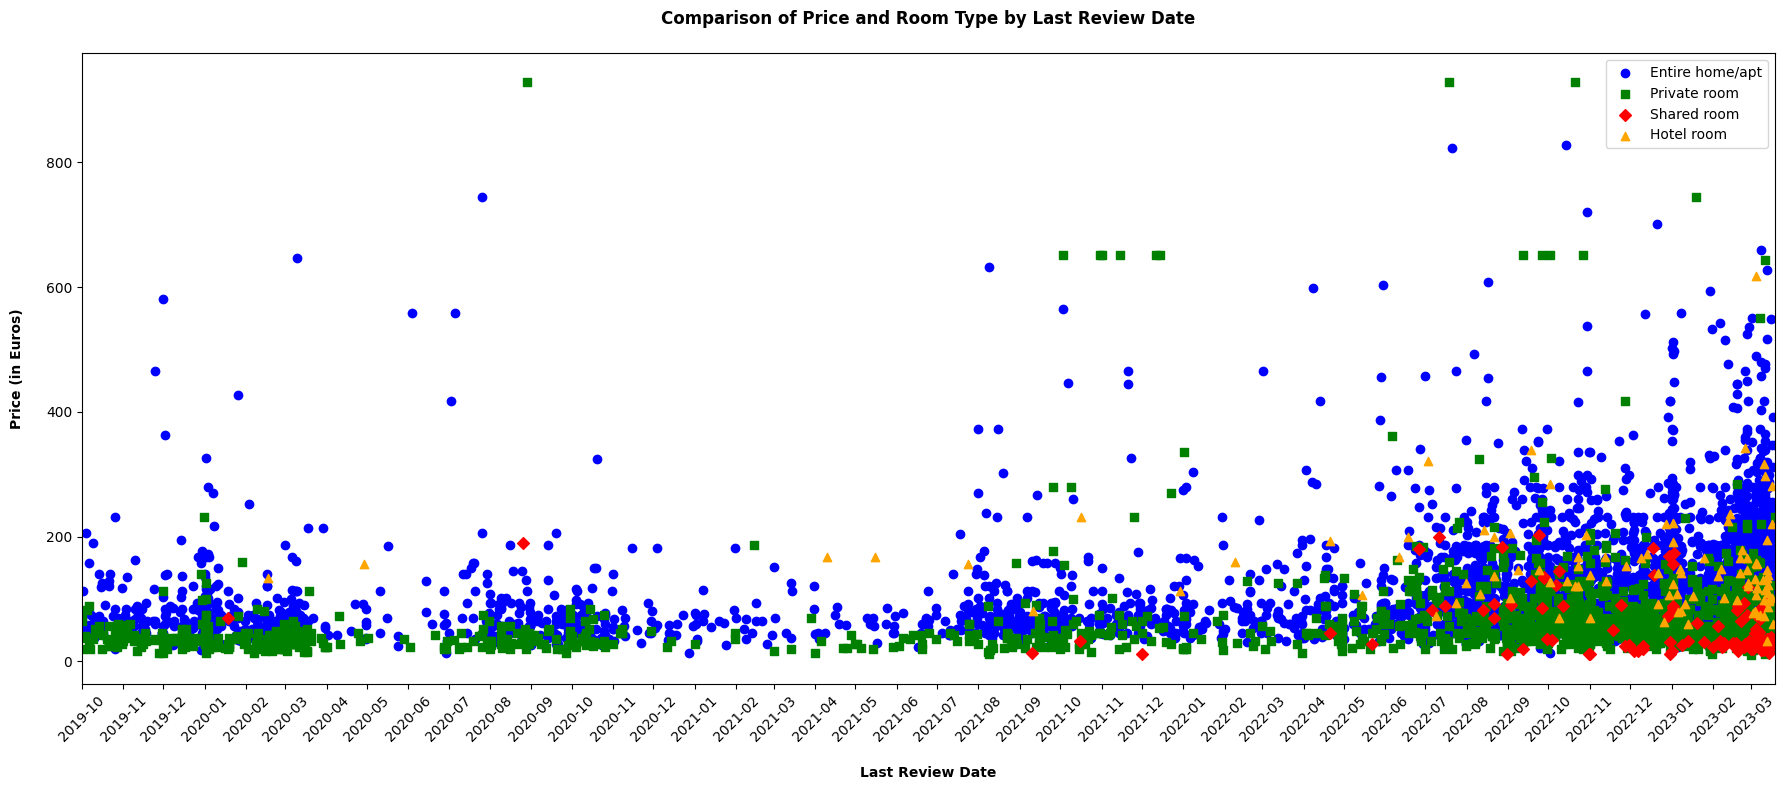

In [62]:
# Filtering the new_data to include only the rows where the 'last_review' dates are greater than or equal to '2019-10-01'
filtered_data = new_data.loc[new_data['last_review'] >= '2019-10-01'].dropna() # we have only 12 NaN values in price column so we can drop them.
filtered_data = filtered_data.sort_values('last_review') # We sort it in ascending order since the time always increases monotonically.
print(f'The time is increases monotonically? ----> {filtered_data.last_review.is_monotonic_increasing}')
# Create the scatter plot
fig, ax = plt.subplots(figsize=(18, 8))

# Define colors and markers for each room type
colors = {'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'red', 'Hotel room': 'orange'}
markers = {'Entire home/apt': 'o', 'Private room': 's', 'Shared room': 'D', 'Hotel room': '^'}

for room_type in colors:
    mask = filtered_data['room_type'] == room_type
    ax.scatter(filtered_data.loc[mask, 'last_review'], filtered_data.loc[mask, 'price'], 
               color=colors[room_type], marker=markers[room_type], label=room_type)

ax.set_xlabel('\nLast Review Date', fontweight='bold')
ax.set_ylabel('Price (in Euros)\n', fontweight='bold')
ax.set_title('Comparison of Price and Room Type by Last Review Date\n', fontweight='bold')
ax.legend()

# Set the x-axis labels with step by month
ax.xaxis.set_major_locator(plb.dates.MonthLocator(interval=1))

# Set the x-axis limits to cover the range of data without extra space
start_date = filtered_data['last_review'].min()
end_date = filtered_data['last_review'].max()
ax.set_xlim(start_date, end_date)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

<span style="font-size: 1.4em;">__A Small Data Story for plot__ </span> <br><br>
**The diagram describes the prices of Airbnb accommodations for a period from October 2019 to March 2023. The y-axis represents the prices, while the x-axis represents the dates. Airbnb accommodations are classified into four categories: "Entire home/apartment" (blue circle), "Private rooms" (green square), and "Shared rooms" (red rhombus) and "Hotel rooms" (orange triangle).**<br><br>
**First of all, the prices of entire homes/apartments are significantly higher than the other categories, conveying a sense of luxury. Private rooms, on the other hand, remain consistently affordable throughout the timeline, providing a comfortable and budget-friendly option for travelers. Shared rooms offer the most economical choice, attracting budget-conscious travelers,. Also the hotel rooms having a larger variance in prices compared to shared rooms and private rooms.**<br><br>
**Several significant events shape the plot. Between April 2020 and July 2020, there is a decrease in rentals for both entire homes/apartments and private rooms, coinciding with the outbreak of COVID-19. However, as the summer of 2020 approaches and restrictions ease, there is a moderate upward trend in demand for both categories.**<br><br>
**Another decrease is observed between November 2020 and August 2021 when the pandemic resurfaces, leading to a decline in rentals. However, after July 2021, there is a significant increase in demand, resulting in a notable price increase, especially for entire homes/apartments. Additionally, the price surge makes shared rooms and some hotel rooms a more favored option compared to previous time periods. Perhaps this is why we see a significant number of shared and hotel rooms being included in Airbnb's services.**<br><br>
**Our graph describes the chronological evolution of accommodation prices in Berlin, as well as the adjustment made by travelers in response to price increases (the emergence of more shared rooms and hotel rooms). It also highlights the impact of external factors, such as the pandemic of Covid, on Airbnb accommodation prices and demand.**

<span style="font-size: 1.4em;">__Analyze the distribution of room types in the dataset.__ </span> 

In [63]:
print('We observe the four types included in the "room_type" column, and we display the corresponding room values for each type, so we can plot this in a pie.')
new_data.room_type.value_counts()

We observe the four types included in the "room_type" column, and we display the corresponding room values for each type, so we can plot this in a pie.


Entire home/apt    6292
Private room       3240
Shared room         119
Hotel room          107
Name: room_type, dtype: int64

**We calculate the number of different room types and their proportions. <br>
And a good way to visualize that is a pie.**

The proportions of each room type registered in the Airbnb company are as follows:

64.69 % of houses is a Entire home/apt
33.14 % of houses is a Private room
1.21 % of houses is a Shared room
0.96 % of houses is a Hotel room


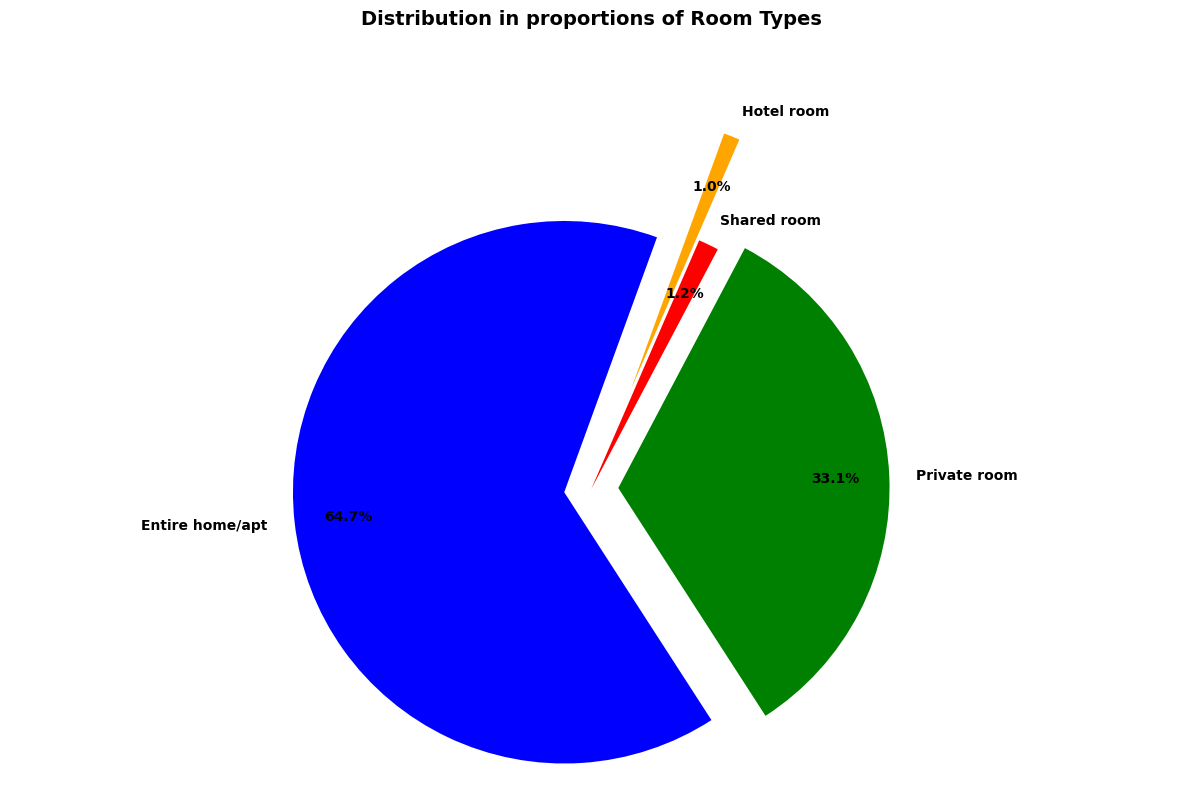

In [64]:
# Calculate the total number of Airbnb by summing the counts of each room type
numbers_of_RBNbs = sum(listings.room_type.value_counts())

# Calculate the number for each room type
number_of_apartments = listings.room_type.value_counts()[0]
number_of_private_rooms = listings.room_type.value_counts()[1]
number_of_shared_rooms = listings.room_type.value_counts()[2] 
number_of_hotel_rooms = listings.room_type.value_counts()[3]

# Display the percentage of each room type out of the total rooms
print('The proportions of each room type registered in the Airbnb company are as follows:\n')
print(f'{round(number_of_apartments / numbers_of_RBNbs, 4)* 100} % of houses is a Entire home/apt')
print(f'{round(number_of_private_rooms / numbers_of_RBNbs, 4)* 100} % of houses is a Private room')
print(f'{round(number_of_shared_rooms / numbers_of_RBNbs, 4)* 100} % of houses is a Shared room')
print(f'{round(number_of_hotel_rooms / numbers_of_RBNbs, 4)* 100} % of houses is a Hotel room')

# Create the data for the pie chart
labels = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
sizes = [number_of_apartments, number_of_private_rooms, number_of_shared_rooms, number_of_hotel_rooms]
colors = ['blue', 'green', 'red', 'orange']

# Create the pie plot
plt.figure(figsize=(15,9))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=70, pctdistance=0.8, explode=[0.1,0.1,0,0.4], textprops={'weight': 'bold'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution in proportions of Room Types', y=1.1, fontsize=14, fontweight='bold')
plt.show()


<span style="font-size: 1.4em;">__Exploring the Relationship Between Host Type and Listing Availability Days__ </span> 

**We find the Frequency of Superhosts and Not Superhosts in a 365 Availability Days and we plot it.**

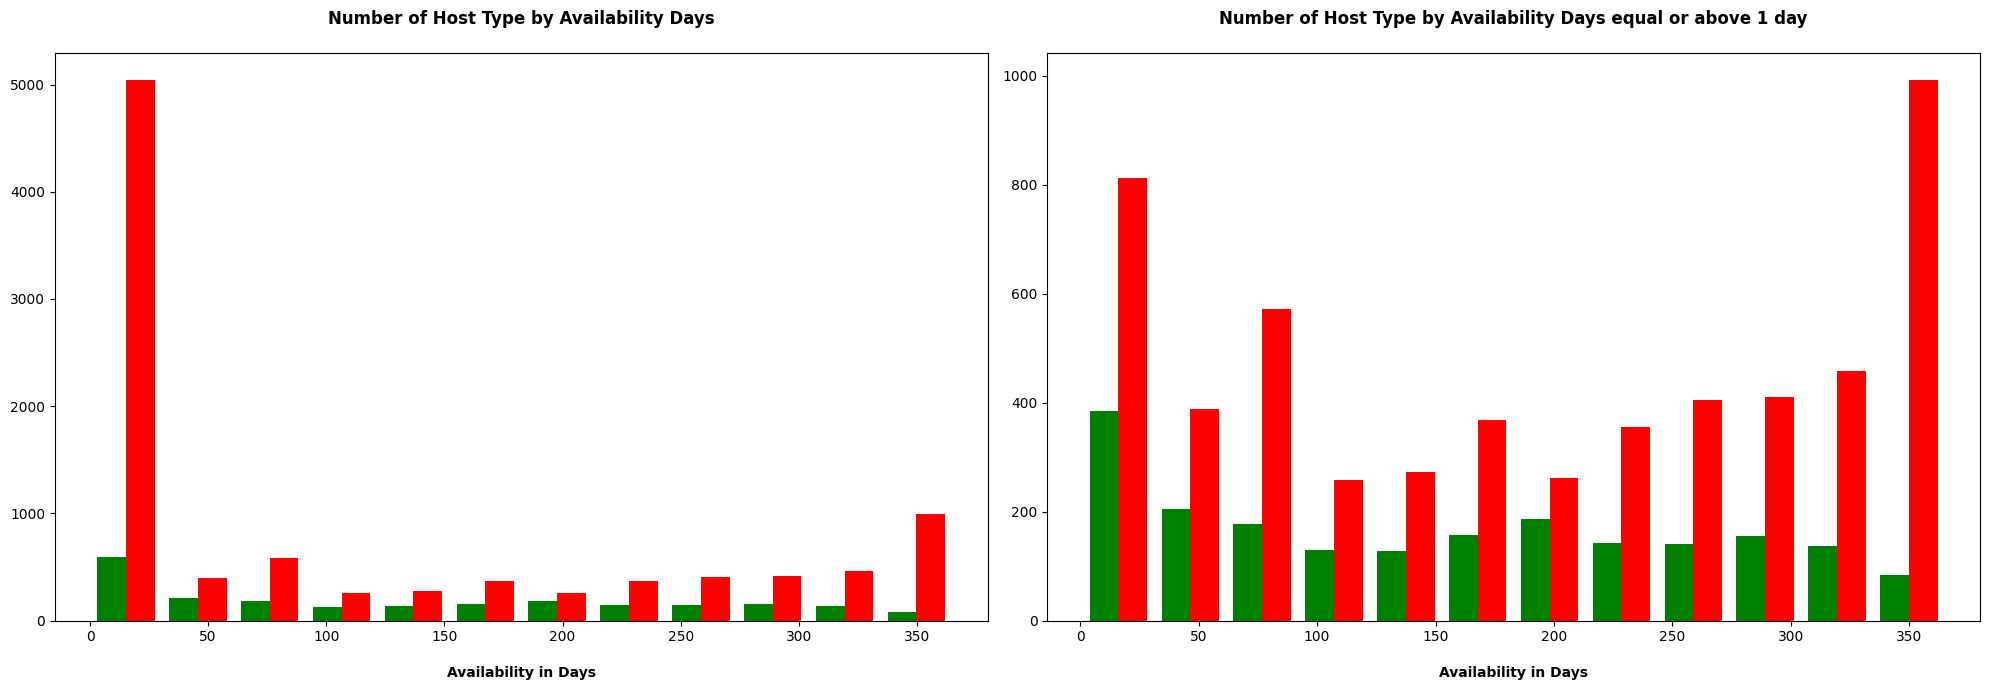

In [65]:
# Separating availability_365 based on host's type

# Selecting availability_365 values for non-superhosts
not_superhost = listings[listings.host_is_superhost == 'f'].availability_365 
# Selecting availability_365 values for superhosts
superhost = listings[listings.host_is_superhost == 't'].availability_365

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot histogram for SuperHost and Not SuperHost
axes[0].hist([superhost, not_superhost], bins=12, label=['SuperHost', 'Not SuperHost'], color=['green', 'red'])
axes[0].set_xlabel('\nAvailability in Days', fontweight='bold')
axes[0].set_title('Number of Host Type by Availability Days\n', fontweight='bold')

# Selecting availability values greater than or equal to 1 for Not Superhosts
not_superhost = not_superhost[not_superhost >= 1]
# Selecting availability values greater than or equal to 1 for Superhosts
superhost = superhost[superhost >= 1]

# Plot histogram for SuperHost and Not SuperHost with availability values >= 1 day
axes[1].hist([superhost, not_superhost], bins=12, label=['SuperHost', 'Not SuperHost'], color=['green', 'red'])
axes[1].set_xlabel('\nAvailability in Days', fontweight='bold')
axes[1].set_title('Number of Host Type by Availability Days equal or above 1 day\n', fontweight='bold')

plt.tight_layout()
plt.show()


<span style="font-size: 1.2em;">__**A Small Data Story.**__ </span> <br><br>
We are generating two plots to improve the visualization of values after one day of availability. This step is crucial because when we have a zero availability days, there is an overwhelming number of counts for that day, making it difficult to clearly display the other bars.

**The histogram plots provides valuable insights into the correlation between listing availability and host type, particularly focusing on the differences between SuperHost and Not SuperHost categories.**

**First of all, when examining the two plots, a significant disparity is evident in the first pair of bars, specifically in the Not Superhost category. This discrepancy indicates a large number of Non-Superhosts with zero availability days. The most logical explanation for this observation is that these hosts have chosen to close their rooms, possibly due to unfavorable conditions or a lack of demand from travelers.**

**One of the most prominent observations is that throughout all periods of availability days, the number of "Not Superhost" listings consistently exceeds that of "Superhost" listings, suggesting a scarcity of superhosts in Berlin. Furthermore, in the right plot, we notice a significant disparity between the two host categories in the low availability days range (1 to 80-90 days). As availability days transition to the medium range (80-90 to 200-220 days), a more balanced distribution between the two categories becomes evident. However, at specific availability day intervals, such as 160 to 180 days, we observe a notable difference again. After 220 days of availability, the disparity between the categories progressively widens, with an increasing number of "Not Superhost" listings and a declining number of "Superhost" listings. In the last bar representing 330 to 365 days, the discrepancy is most pronounced, with 1000 "Not Superhost" listings and only 100 "Superhost" listings.**

**All this shows a logical pattern for a  correlation between the number of superhosts and availability days. Travelers tend to prefer superhosts who have limited availability due to the high demand for their accommodations. As a result, we observe as the number of available days increases, we observe a reduction in the number of SuperHosts. This decrease can be attributed to the fact the travelers tend to close the rooms  of SuperHosts.**

<span style="font-size: 1.4em;">__We Create a new DataFrame from listings to get some statistics about the hosts.__ </span> 

In [66]:
# The columns we keep from hosts is the reviews for their RBNbs.
host_rates = listings[['id','host_name', 'number_of_reviews','review_scores_rating',
                        'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                        'review_scores_communication', 'review_scores_location','review_scores_value', 'reviews_per_month']]

print(f'The nulls who contains the new DF with name host_rates is\n\n{host_rates.isna().sum()}\n')
print('And the new Dataframe is')
host_rates.head()

The nulls who contains the new DF with name host_rates is

id                                0
host_name                        10
number_of_reviews                 0
review_scores_rating           2276
review_scores_accuracy         2390
review_scores_cleanliness      2388
review_scores_checkin          2392
review_scores_communication    2388
review_scores_location         2392
review_scores_value            2394
reviews_per_month              2276
dtype: int64

And the new Dataframe is


,id,host_name,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,163411,Jutta,32,4.69,4.66,4.50,4.72,4.91,4.91,4.66,0.23
1,251423,Raja Jooseppi,14,4.64,4.71,4.57,4.71,4.93,4.86,4.29,0.11
2,3176,Britta,147,4.63,4.68,4.53,4.64,4.69,4.92,4.63,0.88
3,164475,Patrick,21,4.75,4.50,4.58,4.90,4.90,4.90,4.63,0.19
4,251486,Raja Jooseppi,31,4.87,5.00,4.61,4.90,5.00,4.94,4.77,0.24


In [67]:
# The reason we drop all the nulls
print(f'In the new DataFrame host_rates we have {len(host_rates)} rows and the maximum null values who contains the column {host_rates.isna().sum().idxmax()}'
    + f' is {max(host_rates.isna().sum())}.\nSo is not a big deal just to drop the null values, after dropping them the DateFrame'
    +f' will have {len(host_rates) - max(host_rates.isna().sum())} rows.\n')

# Drop the null values
host_rates = host_rates.dropna(how='any', axis=0)
print(f'We drop all the null values\n\n{host_rates.isna().sum()}')

In the new DataFrame host_rates we have 12049 rows and the maximum null values who contains the column review_scores_value is 2394.
So is not a big deal just to drop the null values, after dropping them the DateFrame will have 9655 rows.

We drop all the null values

id                             0
host_name                      0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


In [68]:
host_rates.columns

Index(['id', 'host_name', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

**We create a new "total_rate" column that combines all the host ratings. This column is used to identify the best hosts based on their ratings.**

In [69]:
# we choose specific columns
columns_with_rates = ['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location','review_scores_value']

# Before proceeding, we first examine the values of the rates using the describe() function.
# The conclusions drawn from the describe() results are printed for further analysis.

# create the new column who contains the avairage of all ratings of the columns_with_rates for each row and we round it with 2 demical places.
host_rates['total_rate'] = round(host_rates[columns_with_rates].sum(axis=1) / len(columns_with_rates),2)


print("We check the ratings to see if they have anything strange like outliers or any anomalies, as we see in describe table all the values from the rates are equal between 0 - 5 (min - max)\nwhich is probably"
      +" the stars rating, so we can create the new clumun with total rate.\n")
host_rates[columns_with_rates].describe()

We check the ratings to see if they have anything strange like outliers or any anomalies, as we see in describe table all the values from the rates are equal between 0 - 5 (min - max)
which is probably the stars rating, so we can create the new clumun with total rate.



,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,9650.000000,9650.000000,9650.000000,9650.000000,9650.000000,9650.000000,9650.000000
mean,4.723032,4.779351,4.658086,4.809034,4.808741,4.751772,4.630191
std,0.404551,0.391347,0.478305,0.377054,0.395167,0.361959,0.438791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.620000,4.730000,4.540000,4.770000,4.780000,4.670000,4.500000
50%,4.830000,4.890000,4.800000,4.920000,4.930000,4.850000,4.730000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.890000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**We wanted to determine the best rooms based on the number of reviews and based on the total rate of host. However, we implemented specific filters to ensure a fair evaluation. We focused on hosts who had received ratings from more than 500 reviewers and maintained an average of at least 10 reviews per month.These filters were essential to avoid favoring hosts with a high rate but a low number of reviews.**

**Exquisite Listings: Finest Rooms for Some Host, Ranked by Number Of Reviews but and with highest Total Rate**<br><br>
So we design a plot that arranges the data in ascending order based on the number of reviews, while also incorporating additional information about the total rating.

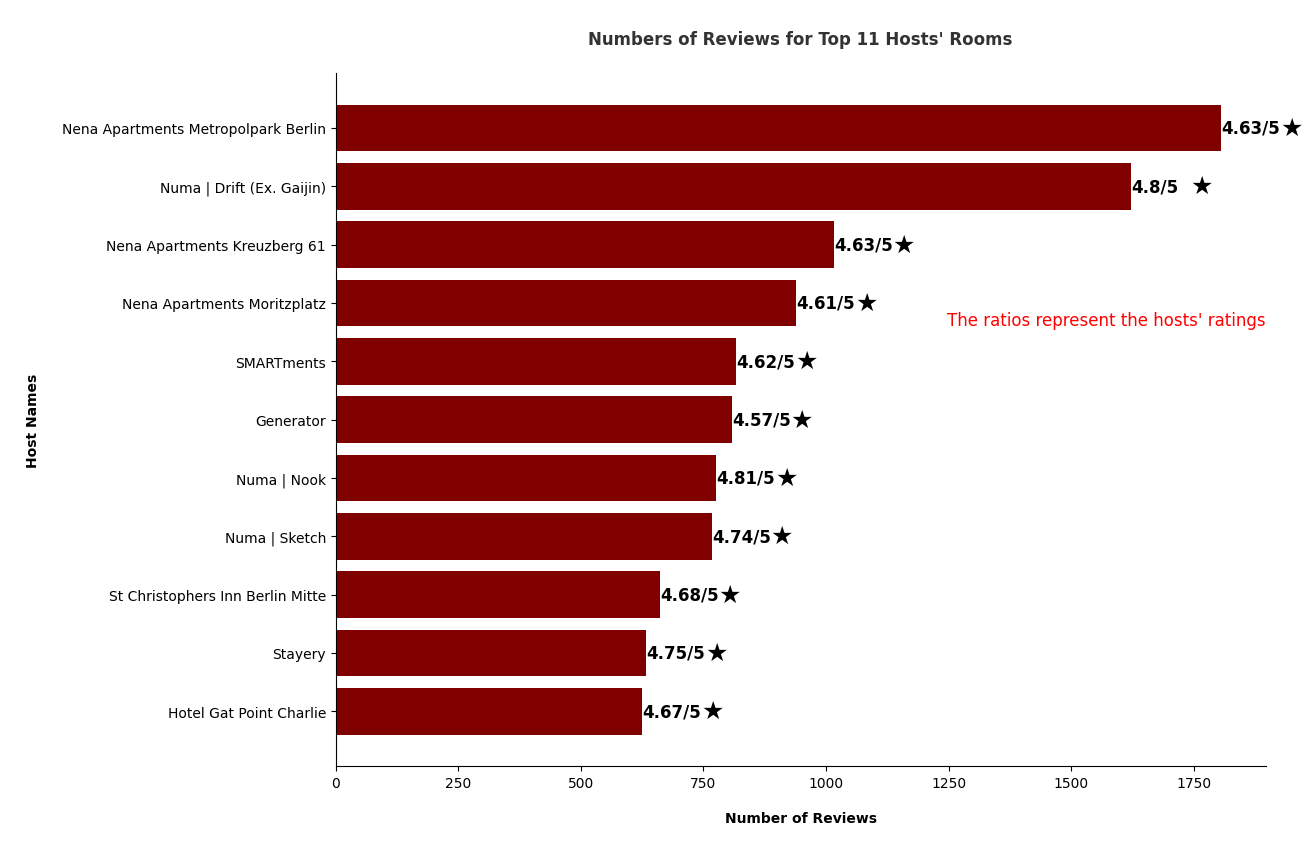

In [70]:
# Sort the DataFrame based on total_rate in descending order
top_hosts = host_rates.sort_values(['total_rate'], ascending=False, axis=0)

# Filter the top hosts based on the number of reviews and reviews per month
top_hosts_filtered = top_hosts[(top_hosts.number_of_reviews >= 500) & (top_hosts.reviews_per_month >= 10)]

# Group the filtered hosts by host_name and select the first entry for each host
first_hosts = top_hosts_filtered.groupby('host_name').max().reset_index()

# Sort the hosts by number_of_reviews in descending order
first_hosts_sorted_by_reviews = first_hosts.sort_values('number_of_reviews', ascending=False)

# Create the barh plot
fig, ax = plt.subplots(figsize=(12, 9))
ax.barh(first_hosts_sorted_by_reviews.host_name, first_hosts_sorted_by_reviews.number_of_reviews, color='maroon')

# Add labels to the bars
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(first_hosts_sorted_by_reviews['total_rate'].iloc[i]) + '/5',
            ha='left', va='center', fontsize=12, fontweight='bold')
    ax.text(bar.get_width() + 120, bar.get_y() + bar.get_height() / 2, '★',
            ha='left', va='center', fontsize=18, fontweight='bold')
    
# Remove the spines (lines around the plot)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set labels and title
ax.set_xlabel('\nNumber of Reviews\n',fontweight='bold')
ax.set_ylabel('\nHost Names\n',fontweight='bold')
ax.set_title("\nNumbers of Reviews for Top 11 Hosts' Rooms\n",fontweight='bold', alpha=0.8)

# Show top values
ax.invert_yaxis()

# Add Text watermark
fig.text(0.9, 0.6, "The ratios represent the hosts' ratings", fontsize=12, color='red', ha='right')

plt.show()


<span style="font-size: 1.4em;">__A Small Data Story for plot__ </span> <br><br>
We are talking about for the finest listing about for finest host's rooms ordered by total_rate and number_of_reviews.<br>
**Based on the provided dataset, a comparison of hosts reveals important inforamtions into their performance and popularity.**<br><br>
**In terms of average ratings, Numa | Nook stands out as the top-rated host with a score of 4.81, followed closely by Numa | Drift (Ex. Gaijin) with a rating of 4.80. Stayery, Numa | Sketch, and St Christophers Inn Berlin Mitte also received favorable average ratings of 4.75, 4.74, and 4.68, respectively.**<br><br>
**When considering the number of reviews, Nena Apartments Metropolpark Berlin proves to be the most popular host with 1806 reviews. Numa | Drift (Ex. Gaijin) and Nena Apartments Kreuzberg 61 also garnered significant attention with 1622 and 1016 reviews, respectively.**<br><br>
**These findings suggest that Numa | Nook, Numa | Drift (Ex. Gaijin), and Stayery are hosts that have consistently received positive ratings and gained popularity among guests.**<br><br>
**Numa | Drift (Ex. Gaijin) emerges as the clear frontrunner among the available options. This conclusion is supported by the host's impressive track record, boasting a substantial number of reviews and an outstanding average rating of 4.8 stars. The consistent stream of positive feedback speaks volumes about the host's ability to deliver a truly exceptional guest experience.**
**Moreover, this positive impression extends beyond the individual host, serving as a testament to the overall excellence of the Numa company. The remarkable performance of Numa | Drift (formerly Gaijin) suggests that other accommodations within the Numa network are likely to uphold similar standards of quality and satisfaction.**<br><br>
**While these metrics provide valuable insights, it is important for potential guests to consider other factors such as price, location, and amenities when choosing their accommodation.**<br><br>
All the above values ​​are listed in the table below which is sorted in descending order based on the "total_rate." Similarly, the above graph is sorted according to the "number_of_reviews."

In [71]:
# Sort the DataFrame based on the 'total_rate' column in descending order
first_hosts_sorted_by_rate = first_hosts.sort_values('total_rate', ascending=False)
first_hosts_sorted_by_rate[['host_name', 'total_rate', 'number_of_reviews']]

,host_name,total_rate,number_of_reviews
6,Numa | Nook,4.81,776
5,Numa | Drift (Ex. Gaijin),4.80,1622
10,Stayery,4.75,633
7,Numa | Sketch,4.74,767
9,St Christophers Inn Berlin Mitte,4.68,661
1,Hotel Gat Point Charlie,4.67,625
2,Nena Apartments Kreuzberg 61,4.63,1016
3,Nena Apartments Metropolpark Berlin,4.63,1806
8,SMARTments,4.62,817
4,Nena Apartments Moritzplatz,4.61,939


<span style="font-size: 1.4em;">__**As we see we have a plethora of appearances by Nena and Numa, so let's refer to the calendar DataFrame and display the average prices for those specific rooms across all upcoming listings to demonstrate their trajectory.**__ </span>

**First of all we keep all the IDs from the listing DataFrame to establish a connection with the listing IDs in the calendar.**

In [72]:
# Specify the host names for which we want to take the IDs
host_names = ['Numa | Drift (Ex. Gaijin)', 'Numa | Nook', 'Numa | Sketch', 'Nena Apartments Metropolpark Berlin', 'Nena Apartments Moritzplatz', 'Nena Apartments Kreuzberg 61']

# Create an empty list to store the listing IDs and host names
listing_ids = []
host_id_mapping_with_name = {}

for name in host_names:
    # Filter the listings DataFrame based on the host name and take the unique IDs
    host_ids = listings.loc[listings['host_name'] == name, 'id'].unique()

    # Append the host IDs 
    listing_ids.extend(host_ids)

    # Map the host IDs with the host name
    for id in host_ids:
        host_id_mapping_with_name[id] = name

    print(f"The host {name} has IDs: {host_ids}\n")
    
print("All listing IDs:", listing_ids)

The host Numa | Drift (Ex. Gaijin) has IDs: [49070135 49086464 49086677 49086780 49087087 49087222 49087312 49087490]

The host Numa | Nook has IDs: [45475252 45475523 45904289 45904559 45904829]

The host Numa | Sketch has IDs: [46812239 46864858 46865074 46865267 46866971 53733380 53744429 53744550]

The host Nena Apartments Metropolpark Berlin has IDs: [34294699 34294913]

The host Nena Apartments Moritzplatz has IDs: [49844243 51856856]

The host Nena Apartments Kreuzberg 61 has IDs: [43798011 43798150 43798210 49509138]

All listing IDs: [49070135, 49086464, 49086677, 49086780, 49087087, 49087222, 49087312, 49087490, 45475252, 45475523, 45904289, 45904559, 45904829, 46812239, 46864858, 46865074, 46865267, 46866971, 53733380, 53744429, 53744550, 34294699, 34294913, 49844243, 51856856, 43798011, 43798150, 43798210, 49509138]


In [73]:
# The map dictionary is 
host_id_mapping_with_name

{49070135: 'Numa | Drift (Ex. Gaijin)',
 49086464: 'Numa | Drift (Ex. Gaijin)',
 49086677: 'Numa | Drift (Ex. Gaijin)',
 49086780: 'Numa | Drift (Ex. Gaijin)',
 49087087: 'Numa | Drift (Ex. Gaijin)',
 49087222: 'Numa | Drift (Ex. Gaijin)',
 49087312: 'Numa | Drift (Ex. Gaijin)',
 49087490: 'Numa | Drift (Ex. Gaijin)',
 45475252: 'Numa | Nook',
 45475523: 'Numa | Nook',
 45904289: 'Numa | Nook',
 45904559: 'Numa | Nook',
 45904829: 'Numa | Nook',
 46812239: 'Numa | Sketch',
 46864858: 'Numa | Sketch',
 46865074: 'Numa | Sketch',
 46865267: 'Numa | Sketch',
 46866971: 'Numa | Sketch',
 53733380: 'Numa | Sketch',
 53744429: 'Numa | Sketch',
 53744550: 'Numa | Sketch',
 34294699: 'Nena Apartments Metropolpark Berlin',
 34294913: 'Nena Apartments Metropolpark Berlin',
 49844243: 'Nena Apartments Moritzplatz',
 51856856: 'Nena Apartments Moritzplatz',
 43798011: 'Nena Apartments Kreuzberg 61',
 43798150: 'Nena Apartments Kreuzberg 61',
 43798210: 'Nena Apartments Kreuzberg 61',
 49509138: 'N

**Find That Rooms In The Calendar**

In [74]:
# Filter the calendar DataFrame based on the listing IDs
filtered_calendar = calendar[calendar['listing_id'].isin(listing_ids)]

# Replace the listing IDs with the host names
filtered_calendar['listing_id'].replace(host_id_mapping_with_name, inplace=True)

# Rename the column listing_id to host_name
filtered_calendar.rename(columns={'listing_id': 'host_name'}, inplace=True)

# Preprocessing the price and adjusted_price
filtered_calendar['price'] = filtered_calendar['price'].str.replace('$', '') # Remove the dollar symbol
filtered_calendar['price'] = pd.to_numeric(filtered_calendar.price, errors='coerce') # Convert to numeric
filtered_calendar['price'] = round(filtered_calendar['price'] * 0.93) # Convert the dollars to euros

filtered_calendar['adjusted_price'] = filtered_calendar['adjusted_price'].str.replace('$', '') # Remove the dollar symbol
filtered_calendar['adjusted_price'] = pd.to_numeric(filtered_calendar.price, errors='coerce') # Convert to numeric
filtered_calendar['adjusted_price'] = round(filtered_calendar['adjusted_price'] * 0.93) # Convert the dollars to euros

print(f"The ids converting to host names and the unique host names is:\n\n{filtered_calendar.host_name.unique()}")

filtered_calendar

The ids converting to host names and the unique host names is:

['Nena Apartments Metropolpark Berlin' 'Nena Apartments Kreuzberg 61'
 'Numa | Nook' 'Numa | Sketch' 'Numa | Drift (Ex. Gaijin)'
 'Nena Apartments Moritzplatz']


,host_name,available,price,adjusted_price,minimum_nights,maximum_nights
date,,,,,,
2023-03-20,Nena Apartments Metropolpark Berlin,t,133.0,124.0,1.0,1125.0
2023-03-21,Nena Apartments Metropolpark Berlin,t,133.0,124.0,1.0,1125.0
2023-03-22,Nena Apartments Metropolpark Berlin,t,133.0,124.0,1.0,1125.0
2023-03-23,Nena Apartments Metropolpark Berlin,f,140.0,130.0,1.0,1125.0
2023-03-24,Nena Apartments Metropolpark Berlin,t,163.0,152.0,1.0,1125.0
...,...,...,...,...,...,...
2024-03-14,Numa | Sketch,f,465.0,432.0,1.0,999.0
2024-03-15,Numa | Sketch,f,465.0,432.0,1.0,999.0
2024-03-16,Numa | Sketch,f,465.0,432.0,1.0,999.0


**We see all that dates in calendar DataFrame is for the future**<br>The Date Introduced in calendar is 2019.<br> Source: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=150111846

**To capture the average prices per date and per company, we fit all that specific rooms for each company and we take the average price per date to show the variation in prices as we move into the future.**

In [75]:
Nena_rooms = ['Nena Apartments Metropolpark Berlin', 'Nena Apartments Moritzplatz', 'Nena Apartments Kreuzberg 61']
Numa_rooms = ['Numa | Drift (Ex. Gaijin)', 'Numa | Nook', 'Numa | Sketch']

#Create two DataFrame 

# For Nena
# Create the DataFrame for the Nena roooms
Nena = filtered_calendar[filtered_calendar['host_name'].isin(Nena_rooms)]

# Calculate the mean prices per date of all rooms for Nena
Nena_means = Nena.groupby(['date']).mean().round(2)  # Calculate mean and round to 2 decimal places
Nena_means['minimum_nights'] = Nena_means['minimum_nights'].astype(int)  # Convert minimum_nights to integer
Nena_means['maximum_nights'] = Nena_means['maximum_nights'].astype(int)  # Convert maximum_nights to integer

# For Numa
# Create the DataFrame for the Numa roooms
Numa = filtered_calendar[filtered_calendar['host_name'].isin(Numa_rooms)]

# Calculate the mean prices per date of all rooms for Numa
Numa_means = Numa.groupby(['date']).mean().round(2)  # Calculate mean and round to 2 decimal places
Numa_means['minimum_nights'] = Numa_means['minimum_nights'].astype(int)  # Convert minimum_nights to integer
Numa_means['maximum_nights'] = Numa_means['maximum_nights'].astype(int)  # Convert maximum_nights to integer

In [76]:
Nena_means

,price,adjusted_price,minimum_nights,maximum_nights
date,,,,
2023-03-19,109.50,101.67,1,1125
2023-03-20,112.00,104.12,1,1125
2023-03-21,112.00,104.12,1,1125
2023-03-22,112.00,104.12,1,1125
2023-03-23,117.75,109.38,1,1125
...,...,...,...,...
2024-03-14,651.00,605.00,1,1125
2024-03-15,651.00,605.00,1,1125
2024-03-16,651.00,605.00,1,1125


In [77]:
Numa_means

,price,adjusted_price,minimum_nights,maximum_nights
date,,,,
2023-03-19,76.00,71.00,1,999
2023-03-20,126.62,117.86,1,999
2023-03-21,122.62,114.00,1,999
2023-03-22,131.57,122.38,1,999
2023-03-23,139.00,129.33,1,999
...,...,...,...,...
2024-03-14,217.00,201.52,1,999
2024-03-15,217.00,201.52,1,999
2024-03-16,217.00,201.52,1,999


In [78]:
Nena_means.isna().sum(), Numa_means.isna().sum()

(price             0
 adjusted_price    0
 minimum_nights    0
 maximum_nights    0
 dtype: int64,
 price             0
 adjusted_price    0
 minimum_nights    0
 maximum_nights    0
 dtype: int64)

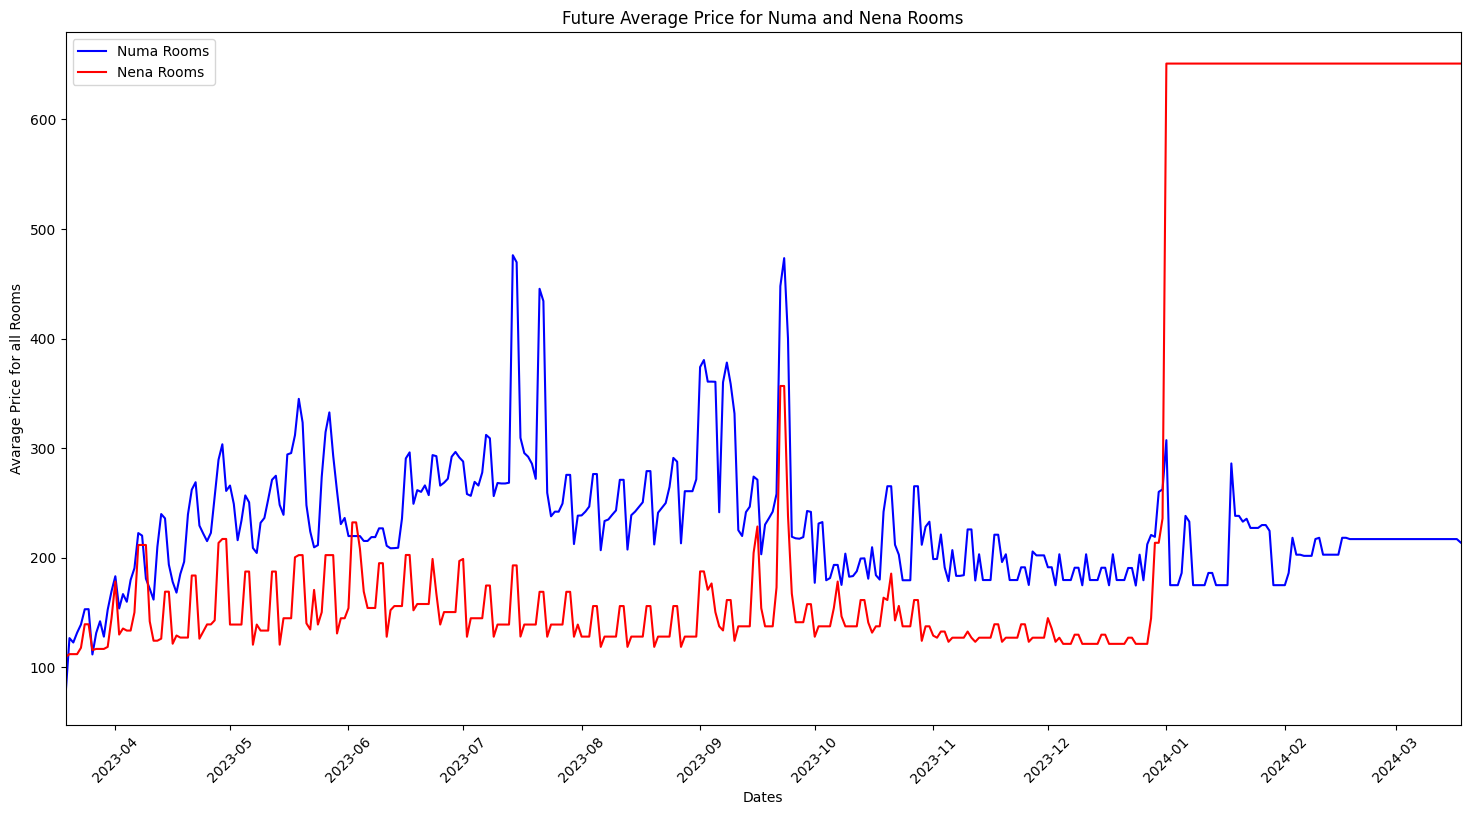

In [79]:
plt.figure(figsize=(18,9))

# Plot Numa mean prices
plt.plot(Numa_means.index, Numa_means['price'], label='Numa Rooms', c='blue')

# Plot Nena mean prices
plt.plot(Nena_means.index, Nena_means['price'], label='Nena Rooms', c='red')

# Set plot title and labels
plt.title('Future Average Price for Numa and Nena Rooms')
plt.xlabel('Dates')
plt.ylabel('Avarage Price for all Rooms')

# Set the x-axis labels with step by month
plt.gca().xaxis.set_major_locator(plb.dates.MonthLocator(interval=1))

# Set the x-axis limits to cover the range of data without extra space
start_date = filtered_calendar.index.min()
end_date = filtered_calendar.index.max()
plt.xlim(start_date, end_date)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.show()


<span style="color:red; font-size: 1.4em;">**The Reason Why We Decide To Create A New Plot**</span><br>
**From the plot we can observe the presence of outliers, specifically in January 2024 for Nena. This suggests that on that particular date, the company may have significantly increased their prices, while remaining stable in the future. However, it is unclear whether this is merely an error or if these values represent the actual prices.Additionally, it is important to note that the Numa company  prices have remained stable since approximately the second half of February 2024. In our opinion, it doesn't make sense for those two energies to happen.**<br><br>
**So to ensure a more accurate representation of the price distribution for both companies, we have generated an other plot specifically focusing on the dates from the first  date of calendar until to the first half December 2023. By excluding the other date values from our analysis, we aim to improve the clarity and reliability of our findings. This decision helps us avoid potential inaccuracies or distortions that could arise from including those dates in our analysis.**

In the following plot of course we have the same patterns for both Nena and Numa.

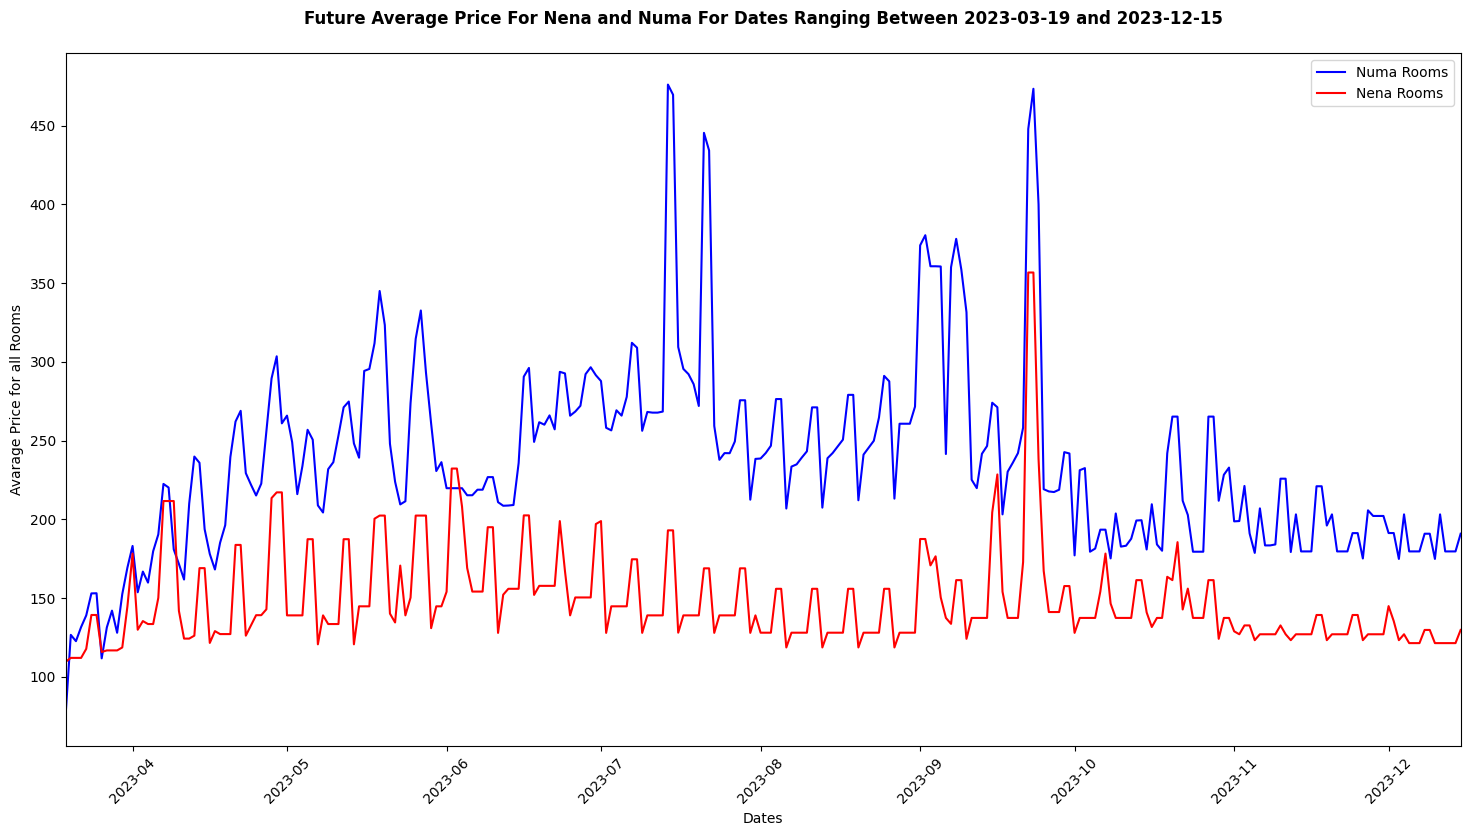

In [80]:
# Filter the Nena and Numa data for dates until 2023-12
Numa_filtered = Numa_means.loc[:'2023-12-15']
Nena_filtered = Nena_means.loc[:'2023-12-15']

# Create agian the same plots but with specific dates
plt.figure(figsize=(18,9))
plt.plot(Numa_filtered.index, Numa_filtered['price'], label='Numa Rooms', c='blue')
plt.plot(Nena_filtered.index, Nena_filtered['price'], label='Nena Rooms', c='red')

plt.title(f"Future Average Price For Nena and Numa For Dates Ranging Between {str(min(Numa_filtered.index.date))} and 2023-12-15\n", fontweight='bold')
plt.xlabel('Dates')
plt.ylabel('Avarage Price for all Rooms')

plt.gca().xaxis.set_major_locator(plb.dates.MonthLocator(interval=1))
start_date = Numa_filtered.index.min()
end_date = Numa_filtered.index.max()
plt.xlim(start_date, end_date)

plt.xticks(rotation=45)
plt.legend()
plt.show()


<span style="font-size: 1.4em;">__**A Small Data Story From Plot**__ </span><br><br>
**In this plot, we explore the future prices of Numa and Nena, two companies offering room rentals on Airbnb. The dataset consists of calendar data from Airbnb, providing insights into the expected price variations between the two companies over time.**<br><br>
**The price comparison chart showcases the anticipated price variations for Numa and Nena. Numa generally has higher prices, except during specific periods like the first half of April 2023 and June 2023 when Nena's prices are expected to surpass Numa's**<br><br>
**Nena exhibits significant seasonality from June to September 2023, while Numa experiences seasonality primarily in August to September 2023. Both companies experience a substantial price surge in the second half of September, followed by a subsequent decrease. This might suggest something important is expected to occur in Berlin around that date. Such as:**<br>
**<span style="color: red;">__Seasonal Demand__ </span>: Maybe the September is a popular time for tourists to visit Berlin due to favorable weather conditions, cultural events, festivals, or other attractions happening during that period. The higher demand for accommodation drives prices upward.**<br>
**<span style="color: red;">__Special Events__ </span>: Berlin maybe host significant events, conferences, exhibitions, or concerts during the second half of September, attracting a large number of visitors. With limited availability of accommodations, prices tend to rise due to increased demand.**<br><br>
**In summary, this comparison of Numa and Nena's future pricing trends reveals variations in pricing dynamics. Numa typically maintains higher prices, except during specific periods. Nena exhibits significant seasonality, while Numa experiences seasonality primarily in August.**<br><br>

<br>**Below, we'll present a histogram depicting the distribution of prices for both companies. It is important to note that we do not have information to trust on Nena's prices beyond 2024-01. Therefore, the data will be displayed until the date of 2023-12-15 for both companies, ensuring that the comparison remains unaffected.**

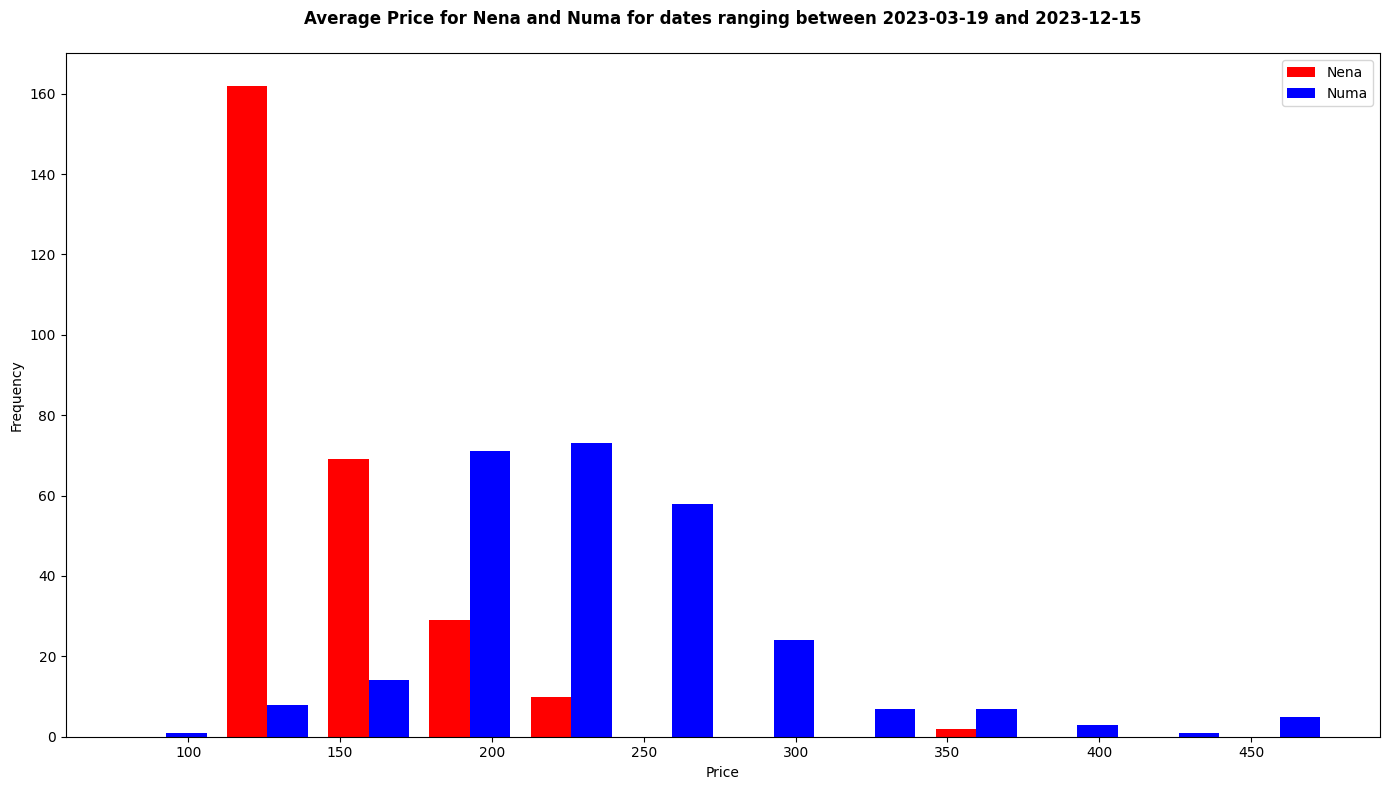

In [81]:
# Create subplots with two axes
plt.figure(figsize=(14,8))

# Plot histogram for Nena
plt.hist([Nena_filtered.price, Numa_filtered.price], bins=12, label=['Nena','Numa'], color=['red','blue'])

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f"Average Price for Nena and Numa for dates ranging between {str(min(Numa_filtered.index.date))} and 2023-12-15\n", fontweight='bold')
plt.legend()

plt.tight_layout()

plt.show()

In [82]:
# For Nena
print('Nena:')
print(f'The lowest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is {Nena_filtered.price.min()} €')
print(f'The highest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is {Nena_filtered.price.max()} €\n')
# For Numa
print('Numa:')
print(f'The lowest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is {Numa_filtered.price.min()} €')
print(f'The highest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is {Numa_filtered.price.max()} €')

Nena:
The lowest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is 109.5 €
The highest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is 356.75 €

Numa:
The lowest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is 76.0 €
The highest price for an Airbnb listing in Nene, for the period between 2023/03/20 and 2023/12/01 is 476.1 €


<span style="font-size: 1.4em;">__**A Small Data Story For Numa and Nena**__ </span><br><br>
**Observing the price distributions of Numa and Nena, along with their philosophies for attracting travelers, reveals interesting patterns.**<br><br>
**Nena have more medium-priced AIRBnBs and fewer options in the higher price range. On the other hand, Numa have fewer medium-priced AIRBnBs but offer a lot of high-priced accommodations.**<br><br>
**Additionally, Nena have prices that don't differ as much and are generally lower compared to Numa. This consistent pricing might attract travelers who are mindful of their budget and prefer more affordable options. On the other hand, Numa have a wider range of prices, including a significant number of high-priced AIRBnBs. This indicates that Numa aim to provide luxurious and high-end accommodations for travelers who are willing to spend more for a deluxe experience.**<br><br>
**It is interesting to note that Numa  have generally received higher ratings compared to Nena. This may be due to the fact that Numa  offer a wider range of prices, which attracts a more diverse group of guests and these guests appreciate the options available to them at different budget levels. On the other hand, although Nena have received a larger number of reviews, indicating popularity and a larger customer base, their narrower price range might have limited their ability to achieve highest ratings from Numa.**<br><br>
**In conclusion, Numa and Nena have different approaches in serving travelers. Nena prioritize offering more medium-priced AIRBnBs to attract a wide range of guests. On the other hand, Numa have a smaller selection of medium-priced options but excel in providing more high-priced accommodations. The difference in pricing and available choices contribute to the higher ratings received by Numa Apartments, while Nena larger number of reviews indicates their popularity among travelers.**

<span style="font-size: 1.4em;">__**Map visualizations with folium library**__ </span>

In [83]:
import folium

In [84]:
neighbourhoods = pd.read_csv('../Berlin Dataset/neighbourhoods.csv')
df = listings[['host_name', 'host_location','host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
                'neighbourhood_group_cleansed', 'latitude','longitude','room_type', 'price', 'availability_365']]

# Preprocessing the price
df['price'] = df['price'].str.replace('$', '') # Remove the dollar symbol
df['price'] = pd.to_numeric(df.price, errors='coerce') # Convert to numeric
df['price'] = round(df['price'] * 0.93) # Convert the dollars to euros

In [85]:
df.neighbourhood_group_cleansed

0        Friedrichshain-Kreuzberg
1                           Mitte
2                          Pankow
3        Friedrichshain-Kreuzberg
4                           Mitte
                   ...           
12044                      Pankow
12045        Charlottenburg-Wilm.
12046      Tempelhof - Schöneberg
12047                    Neukölln
12048                       Mitte
Name: neighbourhood_group_cleansed, Length: 12049, dtype: object

**Visualize all the rooms in Berlin with Names and Prices**

In [86]:
from folium import plugins

# Define the coordinates of Berlin
berlin_lat = listings.latitude.mean()
berlin_long = listings.longitude.mean()
Berlin_coords = [berlin_lat, berlin_long]

# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create a marker cluster object to group the rooms
rooms = plugins.MarkerCluster().add_to(Berlin_map)

# Add a marker for each room with a popup label displaying the room name and price
for name, price, lat, lng in zip(df.host_name, df.price, df.latitude, df.longitude):
    label = f"{name} <br> {price}€"
    folium.Marker(location=[lat, lng], icon=None, popup=label).add_to(rooms)

# Display the map
Berlin_map

# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map.html")

**Visualize only the rooms for the three specific host of Nena and the three specific host of Numa, which have the best total rates and reviews for each company. Which we also analyze above.**

In [87]:
# Define the list of Nena's and Numa's room names
Numa_and_Nena_rooms = ['Nena Apartments Metropolpark Berlin', 'Nena Apartments Moritzplatz', 'Nena Apartments Kreuzberg 61', 
              'Numa | Drift (Ex. Gaijin)', 'Numa | Nook', 'Numa | Sketch']

# Filter the DataFrame to include only the rooms in Numa_and_Nena_rooms
Numa_and_Nema = df[df['host_name'].isin(Numa_and_Nena_rooms)]

# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create a marker cluster object to group the rooms
rooms = plugins.MarkerCluster().add_to(Berlin_map)

# Add a marker for each room with a popup label displaying the room name and price
for name, price, lat, lng in zip(Numa_and_Nema.host_name, Numa_and_Nema.price, Numa_and_Nema.latitude, Numa_and_Nema.longitude):
    label = f"{name} <br> {price}€"
    folium.Marker(location=[lat, lng],icon=None, popup=label).add_to(rooms)

# Display the map
Berlin_map

# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map1.html")

**Visualize all the rooms of Nena and Numa**

In [88]:
# Filter the listing DataFrame to include only the elements with host_names containing Nena or Numa
all_rooms_of_Numa_and_Nena = df[df['host_name'].str.contains('Nena|Numa', case=False, na=False)]

# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create a marker cluster object to group the rooms
rooms = plugins.MarkerCluster().add_to(Berlin_map)

# Add a marker for each room with a popup label displaying the room name and price
for name, price, lat, lng in zip(all_rooms_of_Numa_and_Nena.host_name, all_rooms_of_Numa_and_Nena.price, 
                                 all_rooms_of_Numa_and_Nena.latitude, all_rooms_of_Numa_and_Nena.longitude):
    label = f"{name} <br> {price}€"
    folium.Marker(location=[lat, lng],icon=None, popup=label).add_to(rooms)

# Display the map
Berlin_map

# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map2.html")

**The GeoJSON file obtained from the Inside AirBnB site appears to be corrupted and cannot be executed in folium. So we explore him and we came across a feature that contains a null value within the "neighbourhood" and in "neighbourhood_group" field. Finally, by assigning a value to this field, we successfully enable its functionality.**

In [89]:
import json

# Read the GeoJSON file with correct encoding
with open('../Berlin Dataset/neighbourhoods.geojson', 'r', encoding='utf-8') as f:

    Berlin_geo = json.load(f)   

# Replace None values with 'Unknown' in GeoJSON data
for feature in Berlin_geo['features']:
    
    if feature['properties']['neighbourhood'] is None:
        feature['properties']['neighbourhood'] = 'Unknown'

    if feature['properties']['neighbourhood_group'] is None:
        feature['properties']['neighbourhood_group'] = 'Unknown'

**The structure of GeoJSON.**

In [90]:
Berlin_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[13.411909, 52.614871],
       [13.411826, 52.614838],
       [13.410914, 52.614604],
       [13.410822, 52.614578],
       [13.408516, 52.613961],
       [13.407365, 52.613653],
       [13.40751, 52.613593],
       [13.409923, 52.611614],
       [13.410344, 52.611269],
       [13.410476, 52.611161],
       [13.411191, 52.610709],
       [13.412582, 52.609868],
       [13.413236, 52.609557],
       [13.413555, 52.609405],
       [13.413611, 52.609223],
       [13.415022, 52.605169],
       [13.415149, 52.604873],
       [13.415831, 52.603062],
       [13.415854, 52.602967],
       [13.415843, 52.602537],
       [13.415996, 52.602017],
       [13.41626, 52.601544],
       [13.41659, 52.600657],
       [13.416776, 52.600064],
       [13.416871, 52.599751],
       [13.417183, 52.599564],
       [13.417927, 52.598957],
       [13.419275, 52.597546],
       [13.41967

<span style="font-size: 1.4em;">__**Visualization of Listing Counts, Mean Avarage Price and Median Price by Neighbourhood in Berlin**__ </span><br><br>

**We count the number of listings in every neighbourhood**

In [91]:
# Calculate the count of listings for each neighbourhood
neighbourhoodscounts = df.neighbourhood_cleansed.value_counts().reset_index()

# Rename the columns to neighbourhood and listings
neighbourhoodscounts.columns = ['neighbourhood', 'listings']
neighbourhoodscounts

,neighbourhood,listings
0,Alexanderplatz,785
1,Frankfurter Allee Süd FK,638
2,Tempelhofer Vorstadt,593
3,Brunnenstr. Süd,496
4,Reuterstraße,437
...,...,...
131,Neu-Hohenschönhausen Nord,3
132,"Malchow, Wartenberg und Falkenberg",2
133,Allende-Viertel,2
134,Neu-Hohenschönhausen Süd,2


**Visualize this counts of neighbourhood listings with folium library**

In [92]:
# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create the plot
folium.Choropleth(
    geo_data=Berlin_geo,
    data=neighbourhoodscounts,
    columns=['neighbourhood', 'listings'],
    key_on='feature.properties.neighbourhood',
    bins=6,
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Airbnb listings',
    show=True,
    overlay=True,
    nan_fill_color = "Black"
).add_to(Berlin_map)

Berlin_map

# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map3.html")

**When we look at the distribution of Airbnb listings in different areas, we notice certain patterns based on geography. Specifically, areas located in the middle tend to have a higher number of listings. One prominent example is Alexanderplatz, which is centrally located and has the largest number of listings, totaling 785.**<br><br>
**There are also other areas with a significant number of Airbnb listings, such as Frankfurter Allee Süd FK (638), Tempelhofer Vorstadt (593), and Brunnenstr. Süd (496).  These areas likely benefit from their proximity to central attractions and convenient transportation links.**<br><br>
**On the other hand, there are regions with fewer listings, like Marzahn-Nord (1), Neu-Hohenschönhausen Süd (2), and Malchow, Wartenberg und Falkenberg (2). These areas, located further away from the city center, may attract fewer tourists or have different preferences when it comes to accommodation.**<br><br>
**By considering both the number of listings and the geographic context, we can observe that Airbnb options are more concentrated in centrally located areas like Alexanderplatz, while more peripheral regions may have relatively fewer options available.**

**Calculate the Mean Average Price per Neibourhood**

In [93]:
# Group the data by neighbourhood_cleansed and calculate the mean price
berlin_mean_price = df.groupby(by="neighbourhood_cleansed").mean().reset_index()

# Round the price column to two decimal places
berlin_mean_price = berlin_mean_price[['neighbourhood_cleansed', 'price']].round(2)

# Most 10 expensive neighbourhoods based on mean price
berlin_mean_price.sort_values(['price'], ascending=False).head(10)

,neighbourhood_cleansed,price
71,Marzahn-Süd,322.95
44,Haselhorst,200.78
75,Müggelheim,181.75
24,Charlottenburg Nord,166.00
30,Forst Grunewald,163.40
109,Schmöckwitz/Karolinenhof/Rauchfangswerder,155.87
70,Marzahn-Nord,140.00
104,Rummelsburger Bucht,132.56
2,Alexanderplatz,125.08
100,Regierungsviertel,124.37


In [94]:
# Most 10 cheapest neighbourhoods based on mean price
berlin_mean_price.sort_values(['price'], ascending=False).tail(10)

,neighbourhood_cleansed,price
19,Brunsbütteler Damm,53.31
36,Friedrichsfelde Süd,52.31
8,Altglienicke,51.71
11,Baumschulenweg,51.44
127,West 4,49.88
61,Lankwitz,49.50
60,Köpenick-Süd,41.52
39,Gropiusstadt,39.78
3,Allende-Viertel,39.50
69,Marzahn-Mitte,28.60


**Visualize the Mean Average Price per Neibourhood**

In [95]:
# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create the plot
folium.Choropleth(
    geo_data=Berlin_geo,
    data=berlin_mean_price,
    columns=['neighbourhood_cleansed', 'price'],
    key_on='feature.properties.neighbourhood',
    bins=8,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Average Price (Euro)',
    show=True,
    overlay=True,
    nan_fill_color = "Black"
).add_to(Berlin_map)

Berlin_map


# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map4.html")

**Calculate the Median Price per Neibourhood**

In [96]:
# Group the data by neighbourhood_cleansed and calculate the median price
berlin_median_price = df.groupby(by="neighbourhood_cleansed").median().reset_index()

# Round the price column to two decimal places
berlin_median_price = berlin_median_price[['neighbourhood_cleansed', 'price']].round(2)

# Top most expensive neighbourhoods based on median price
berlin_median_price.sort_values(['price'], ascending=False).head(10)

,neighbourhood_cleansed,price
44,Haselhorst,232.0
30,Forst Grunewald,182.0
71,Marzahn-Süd,143.0
70,Marzahn-Nord,140.0
75,Müggelheim,136.0
128,West 5,127.0
81,Niederschöneweide,112.0
98,Prenzlauer Berg Südwest,110.0
37,Friedrichshagen,101.0
100,Regierungsviertel,100.0


In [97]:
# Most 10 cheapest neighbourhoods based on median price
berlin_median_price.sort_values(['price'], ascending=False).tail(10)

,neighbourhood_cleansed,price
12,Biesdorf,44.5
86,Ost 1,42.5
61,Lankwitz,42.0
55,Kaulsdorf,42.0
36,Friedrichsfelde Süd,41.0
39,Gropiusstadt,41.0
11,Baumschulenweg,39.5
3,Allende-Viertel,39.5
60,Köpenick-Süd,33.0
69,Marzahn-Mitte,25.0


**Visualize the Median Price per Neibourhood**

In [98]:
# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create the plot
folium.Choropleth(
    geo_data=Berlin_geo,
    data=berlin_median_price,
    columns=['neighbourhood_cleansed', 'price'],
    key_on='feature.properties.neighbourhood',
    bins=8,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median Price (Euro)',
    show=True,
    overlay=True,
    nan_fill_color = "Black"
).add_to(Berlin_map)

Berlin_map



# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map5.html")

**A Short Note For The Most Obvious Points:**<br>
**The neighborhoods of Haselhorst, Forst Grunewald and Marzahn-Süd display distinct variations in the color scheme if we compare two plots. These changes in color on the plot indicate fluctuations in the median prices within these areas.**<br><br>
**This means:**<br>
**The average cost of Airbnbs in certain neighborhoods can be greatly affected by a big difference in prices. This means that there are significant variations in the prices of individual listings within the area. As a result, the average price may not give an accurate picture of the actual pricing situation in the neighborhood because of the wide range of prices that exist.**

We will use and neighborhood groups to help us make conclusions more easily because these diagrams provide us with a lot of information.

<span style="font-size: 1.4em;">__**Visualize Mean Avarage Price and Median Price by Neighbourhood Group in Berlin**__ </span><br><br>

In [99]:
# Group the data by neighbourhood_group_cleansed and calculate the mean price
berlin_mean_price = df.groupby(by="neighbourhood_group_cleansed").mean().reset_index()

# Round the price column to two decimal places
berlin_mean_price = berlin_mean_price[['neighbourhood_group_cleansed', 'price']].round(2)
berlin_mean_price.sort_values(['price'], ascending=False)

,neighbourhood_group_cleansed,price
3,Marzahn - Hellersdorf,122.88
4,Mitte,106.72
0,Charlottenburg-Wilm.,92.86
6,Pankow,91.67
10,Tempelhof - Schöneberg,88.58
1,Friedrichshain-Kreuzberg,87.51
9,Steglitz - Zehlendorf,85.73
11,Treptow - Köpenick,85.29
8,Spandau,81.25
2,Lichtenberg,73.70


In [100]:
# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create the plot
folium.Choropleth(
    geo_data=Berlin_geo,
    data=berlin_mean_price,
    columns=['neighbourhood_group_cleansed', 'price'],
    key_on='feature.properties.neighbourhood_group',
    bins=8,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Average Price (Euro)',
    show=True,
    overlay=True,
    nan_fill_color = "Black"
).add_to(Berlin_map)

Berlin_map



# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map7.html")

In [101]:
# Group the data by neighbourhood_group_cleansed and calculate the median price
berlin_median_price = df.groupby(by="neighbourhood_group_cleansed").median().reset_index()

# Round the price column to two decimal places
berlin_median_price = berlin_median_price[['neighbourhood_group_cleansed', 'price']].round(2)
berlin_median_price.sort_values(['price'], ascending=False)

,neighbourhood_group_cleansed,price
4,Mitte,83.0
0,Charlottenburg-Wilm.,74.0
6,Pankow,74.0
1,Friedrichshain-Kreuzberg,70.0
11,Treptow - Köpenick,70.0
10,Tempelhof - Schöneberg,67.0
9,Steglitz - Zehlendorf,64.0
3,Marzahn - Hellersdorf,62.5
8,Spandau,61.0
2,Lichtenberg,57.0


In [102]:
# Create a map object centered at Berlin coordinates with a zoom level of 10
Berlin_map = folium.Map(location=Berlin_coords, zoom_start=10)

# Create the plot
folium.Choropleth(
    geo_data=Berlin_geo,
    data=berlin_median_price,
    columns=['neighbourhood_group_cleansed', 'price'],
    key_on='feature.properties.neighbourhood_group',
    bins=8,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Average Price (Euro)',
    show=True,
    overlay=True,
    nan_fill_color = "Black"
).add_to(Berlin_map)

Berlin_map



# Save the map to an HTML file
Berlin_map.save("berlin_marker_cluster_map8.html")

<span style="font-size: 1.4em;">__**A concise description of the map plots with Median and Average Price.**__ </span><br><br>
**In summary, the AirBnBs rooms in Berlin showcases diverse pricing patterns among different neighborhood groups. By analyzing the median and mean prices, we can make intriguing comparisons using the analogy of Airbnb rooms.**<br><br>
**One standout is Marzahn - Hellersdorf	. Comparing median and mean prices reveals an interesting contrast. Marzahn - Hellersdorf has a median price of 62.5€, suggesting most properties fall within a moderate range. However, the mean price jumps higher to 122.88€, indicating the presence of pricier rooms.**<br><br>
**As we going to the center of Berlin, Mitte takes the spotlight. With a median price of 106.72€ and median 83.0€, so the properties in this neighborhood group command a premium.  So to living in the heart of the city comes at a higher cost. That happening and in other center areas Pankow, Charlottenburg-Wilm.**<br><br>
**In Treptow - Köpenick there is a small intriguing contrast between the affordable median price (median price of 70.0€) and a higher mean price (mean price rises to 85.29€), reflecting a mix of affordability and a few higher-priced properties, similar to the diverse range of room prices within a neighborhood on Airbnb.**